In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import sys
sys.path.append('../uscode')

import itertools
import functools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [37]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import *

In [26]:
usc = USCode.from_json('../data/usc20191009-enhanced.json')
titles = list(usc.titles())
print(len(titles))

cn = CitationNetwork(usc)
print(len(cn.nodes))

53
64171


In [61]:
def apply_clustering(distance_func):
    clustering = Clustering(titles, distance_func)
    plt.figure(figsize=(16, 12))
    clustering.plot_dendrogram()
    plt.xticks(fontsize=14)

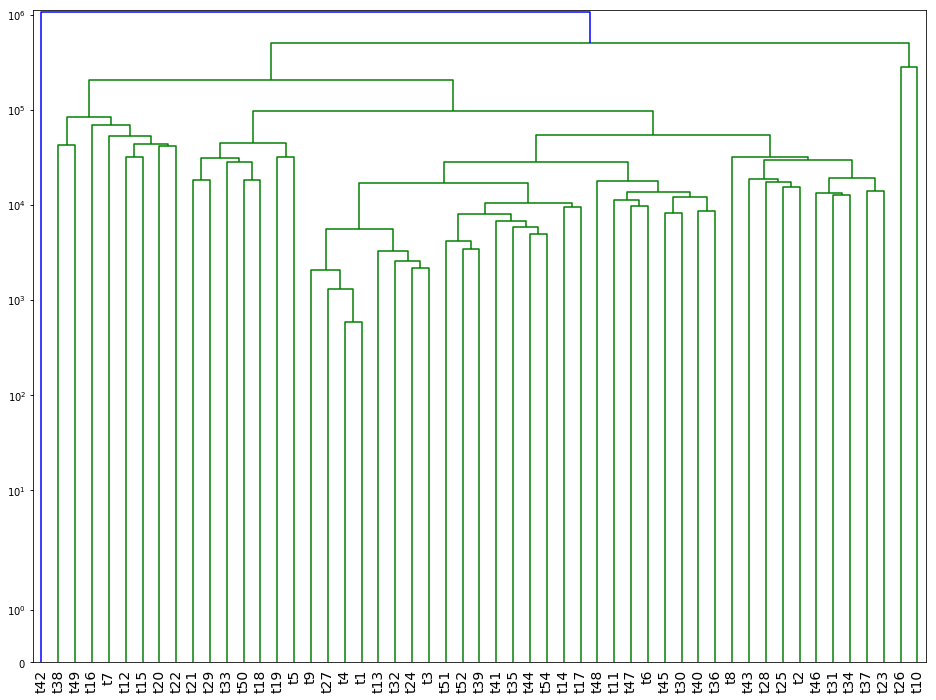

In [70]:
apply_clustering(vectorization_distance)
plt.yscale('symlog')

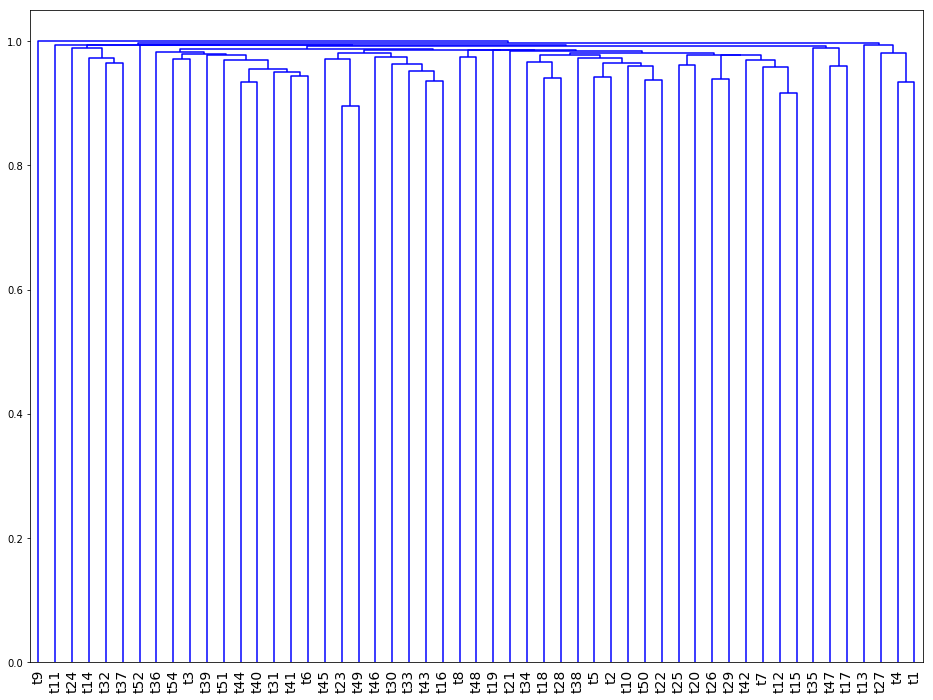

In [62]:
apply_clustering(citation_distance)

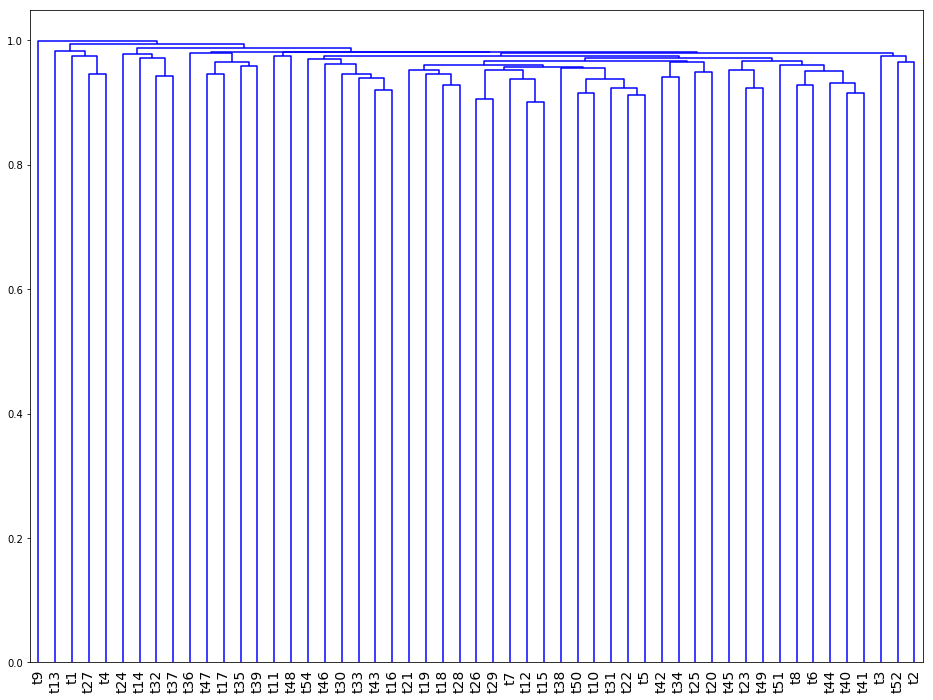

In [38]:
apply_clustering(unweighted_citation_distance)

In [40]:
with open('../data/title_sinks_weighted.json') as f:
    title_sinks = json.load(f)
    
for title in title_sinks:
    title_sinks[title] = Counter(title_sinks[title])

In [42]:
def sink_distance(t1, t2):
    n_shared = sum((title_sinks[t1.id] & title_sinks[t2.id]).values())
    n_total = sum((title_sinks[t1.id] | title_sinks[t2.id]).values())
    return 1 - n_shared / max(1, n_total)

def unweighted_sink_distance(t1, t2):
    n_shared = len(title_sinks[t1.id].keys() & title_sinks[t2.id].keys())
    n_total = len(title_sinks[t1.id].keys() | title_sinks[t2.id].keys())
    return 1 - n_shared / max(1, n_total)

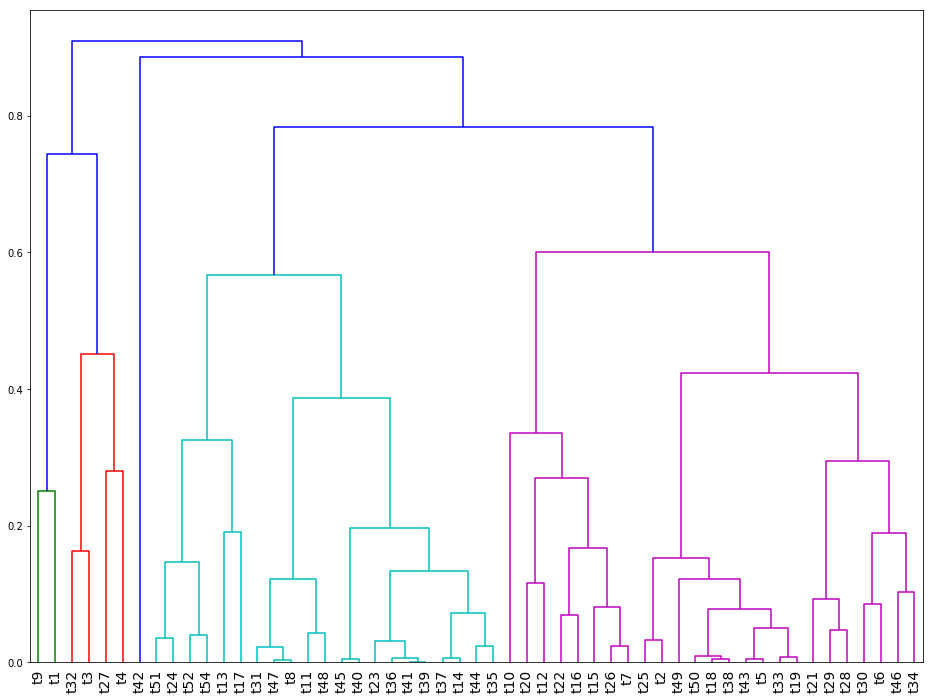

In [63]:
apply_clustering(sink_distance)

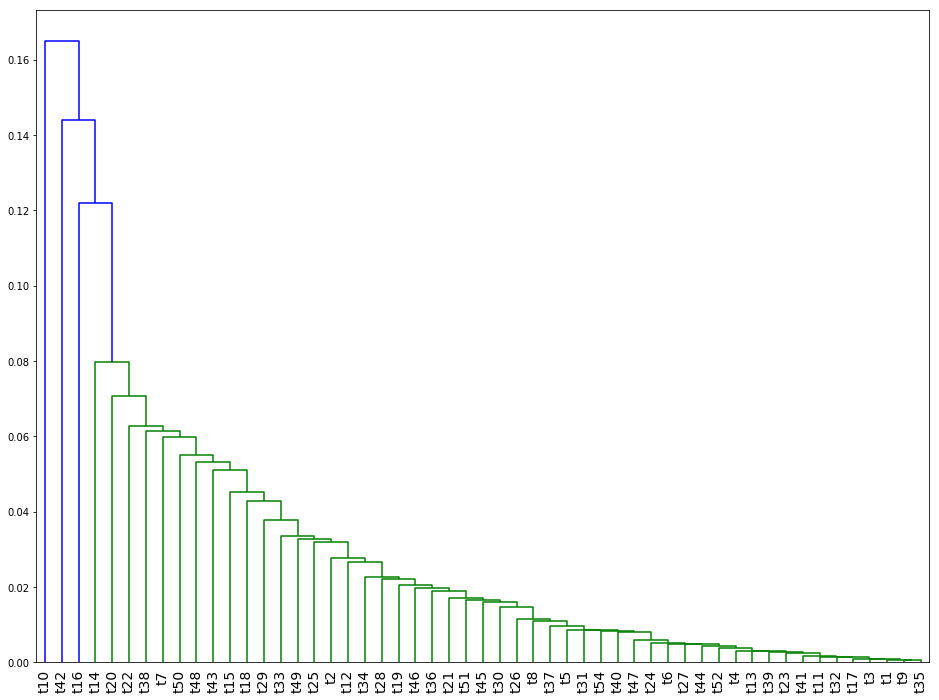

In [67]:
apply_clustering(unweighted_sink_distance)